#                          Practica ipython

### Primer punto

Se realiza un análisis experimental del insertion sort, para el cual se toma el tiempo de ejecución que le toma a este algoritmo ordenar arreglos de tamaños 4, 5 y 6 para el mejor, peor y caso promedio. A partir de los tiempos tomados se procede a hallar los coeficientes del polinomio cuadrático An² + Bn + C para cada uno de los casos y por último se grafican los polinomios.

In [1]:
import time
import itertools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Para tomar el tiempo de ejecución se utiliza la función clock() de la librería time y se modifica el algoritmo para que retorne dicho tiempo.
La función t(n) recibe el tamaño del arreglo y realiza 1000 muestras para el mejor,peor y caso promedio y almacena el promedio de los tiempos hallados con las muestras.

In [3]:
def insertion_sort(L):
    t0 = time.clock()
    j = 1
    while j < len(L):
        key = L[j]
        i = j - 1
        while (i >= 0) and (L[i] > key):
            L[i + 1] = L[i]
            i = i -1
        L[i + 1] = key
        j = j + 1
    return time.clock() - t0

def t(n):
    times = [0.0,0.0,0.0]
    t = 0.0; c = 0.0
    samples = 500
    for i in xrange(samples):
        L = range(1,n+1)
        S = range(n,0,-1)
        times[0] += insertion_sort(L)
        for p in itertools.permutations(L):
            t += insertion_sort(list(p))
            c += 1
        times[1] += t/c
        times[2] += insertion_sort(S)
    print "n=%d"%(n)
    print "Tiempo mejor caso:",times[0]/samples
    print "Tiempo caso promedio:",times[1]/samples
    print "Tiempo peor caso:",times[2]/samples
    return times

T = []
for i in xrange(4,7):
    T.append(t(i))

n=4
Tiempo mejor caso: 9.04915452848e-07
Tiempo caso promedio: 1.32972574528e-06
Tiempo peor caso: 1.47711624486e-06
n=5
Tiempo mejor caso: 1.11617643286e-06
Tiempo caso promedio: 1.67047241739e-06
Tiempo peor caso: 2.04846172926e-06
n=6
Tiempo mejor caso: 1.31118656826e-06
Tiempo caso promedio: 2.24041794434e-06
Tiempo peor caso: 2.82251511758e-06


Una vez hallados los tiempos se utiliza la librería matplotlib.pyplot para graficar los resultados.

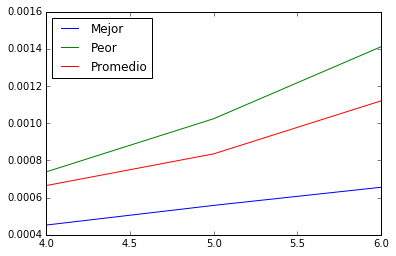

In [4]:
x = np.linspace(4,6,3)
best = [T[0][0],T[1][0],T[2][0]]
worst = [T[0][2],T[1][2],T[2][2]]
avg = [T[0][1],T[1][1],T[2][1]]

plt.plot(x,best,x,worst,x,avg)
plt.legend(['Mejor','Peor','Promedio'],loc='best')

Utilizando la función polyfit() se pueden encontrar los coeficientes del polinomio  An² + Bn + C dados n = 4,5,6 y los respectivos tiempos para cada caso.

In [5]:
n = np.arange(4,7,1)
b = np.polyfit(n,best,2) 
a = np.polyfit(n,avg,2)
w = np.polyfit(n,worst,2)

print "Polinomio en el mejor caso: (%.16f)x² + (%.16f)x + (%.16f)" % (b[0],b[1],b[2])
print "Polinomio en el caso promedio: (%.16f)x² + (%.16f)x + (%.16f)" % (a[0],a[1],a[2])
print "Polinomio en el peor caso: (%.16f)x² + (%.16f)x + (%.16f)"% (w[0],w[1],w[2])

Polinomio en el mejor caso: (-0.0000040627111512)x² + (0.0001421948903643)x + (-0.0000513184566144)
Polinomio en el caso promedio: (0.0000572997137107)x² + (-0.0003453240873419)x + (0.0011293638026381)
Polinomio en el peor caso: (0.0000506769759793)x² + (-0.0001704200416129)x + (0.0006094066732130)


Utilizando la función interp1d() se grafican los polinomios de tal manera que se vea la función cuadrática. 

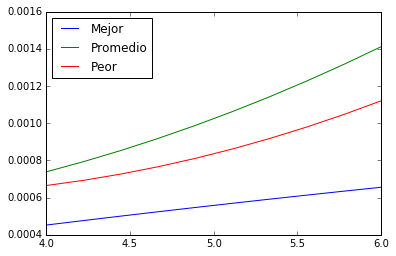

In [6]:
n = np.linspace(4,6,3)
n2 = np.linspace(4,6,10)

yb = b[0]*(n**2)+b[1]*n+b[2]
ya = a[0]*(n**2)+a[1]*n+a[2]
yw = w[0]*(n**2)+w[1]*n+w[2]

fb = interp1d(n,yb,kind='quadratic')
fw = interp1d(n,ya,kind='quadratic')
fa = interp1d(n,yw,kind='quadratic')

plt.plot(n2,fb(n2),n2,fa(n2),n2,fw(n2))
plt.legend(['Mejor','Promedio','Peor'],loc='best')

### Segundo punto

Mediante un análisis experimental se va a determinar una aproximación del valor máximo en el cual el insertion sort funciona mas rápido que el merge sort. Por último se va a ImplementaR el merge sort con insertion sort.

La función t2(n) realiza la cantidad de muestras(determinadas por la variable "samples") por tamaño para el mejor,peor y caso promedio y almacena el promedio de los tiempos hallados con las muestras.
Investigando en internet se encontró la función WC() que toma el arreglo y lo divide en arreglos de tamaño 2 y hace swap a cada uno, lo cualse supone que simula el peor caso para el merge sort, pero a partir del experimento se va a demostrar que no hay un peor caso exacto para el merge sort.

In [7]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def merge_sort(A):
    t0 = time.clock()
    merge_sort_main(A, 0, len(A) - 1)
    return time.clock() - t0

def WC(A):
    if len(A) <= 1:
        return A
    if len(A) == 2:
        A[0],A[1] = A[1],A[0]
        return A
    i=0;j=0
    L = []; R = []
    while i < len(A):
        L.append(A[i])
        i+=2; j+=1
    i=1; j=0
    while i < len(A):
        R.append(A[i])
        i+=2; j+=1
    L = WC(L)
    R = WC(R)
    return L + R

def t2(a,b):
    for n in xrange(a,b+1,5):
        timesm = [0.0,0.0,0.0]; timesi = [0.0,0.0,0.0]
        samples = 1000
        for i in xrange(samples):
            B = range(1,n+1)
            A = np.random.permutation(n)
            Wi = range(n,0,-1)
            Wm = WC(B)
            timesi[0] += insertion_sort(list(B)); timesm[0] += merge_sort(list(B))
            timesi[1] += insertion_sort(list(A)); timesm[1] += merge_sort(list(A))
            timesi[2] += insertion_sort(list(Wi)); timesm[2] += merge_sort(list(Wm))
        Besti.append(timesi[0]/samples);Avgi.append(timesi[1]/samples);Worsti.append(timesi[2]/samples);
        Bestm.append(timesm[0]/samples);Avgm.append(timesm[1]/samples);Worstm.append(timesm[2]/samples);
        
Besti = []; Avgi = []; Worsti = []
Bestm = []; Avgm = []; Worstm = []
minim = 1; maxim = 150
t2(minim,maxim)

A partir de los tiempos obtenidos para la ejecución del insertion sort se grafican los datos de los 3 casos.

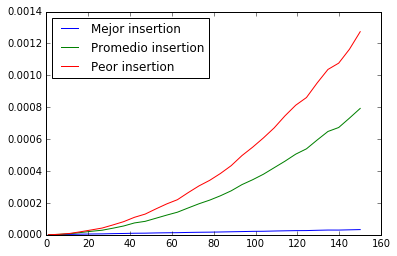

In [8]:
x = np.linspace(minim,maxim,maxim/5)#n-m+1)
plt.plot(x,Besti,x,Avgi,x,Worsti)
plt.legend(['Mejor insertion','Promedio insertion','Peor insertion'],loc='best')

Al igual que con el insertion sort, se realiza la gráfica de los datos obtenidos para los 3 casos del merge sort; aqui se nota como no existe un peor caso concreto ya que el arreglo que se pensaba que era el peor caso tiene el mismo tiempo que el mejor, ademas se puede observar como el caso promedio toma un mayor tiempo por lo que el caso promedio se tomará como peor caso.

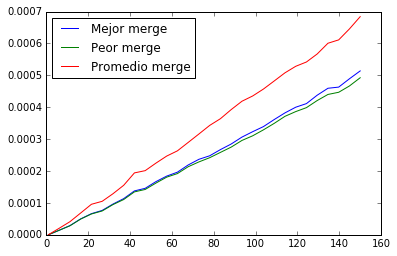

In [9]:
plt.plot(x,Bestm,x,Worstm,x,Avgm)
#plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor merge','Peor merge','Promedio merge'],loc='best')

Al comparar los tiempos que se toman ambos algoritmos para el mejor caso se puede observar como el insertion sort es mejor ya que la complejidad del mejor caso es de Ɵ(n) mientras que la complejidad del mejor caso del merge es de Ɵ(nlogn).

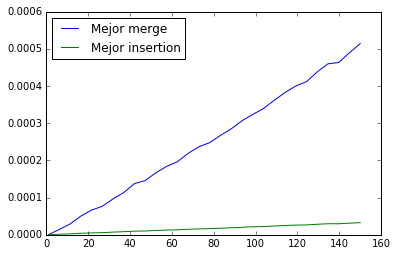

In [10]:
plt.plot(x,Bestm,x,Besti)
#plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Mejor merge','Mejor insertion'],loc='best')

Comparando las gráficas de los casos promedio se observa como el insertion sort es mejor hasta un tamaño entre 120 y 140, en donde el merge sort comienza a funcionar en un mejor tiempo.

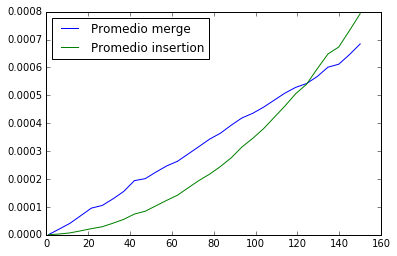

In [11]:
plt.plot(x,Avgm,x,Avgi)
#plt.plot(x2,f1(x2),x2,f2(x2),x2,f3(x2))
plt.legend(['Promedio merge','Promedio insertion'],loc='best')

Por último al comparar el peor caso del insertion sort con el "peor" caso del merge(ya se mostro que el tiempo es igual que con el mejor caso), se ve como el insertion sort comienza siendo mejor hasta un tamaño entre 40 y 60 en donde el merge empieza a correr en menos tiempo.

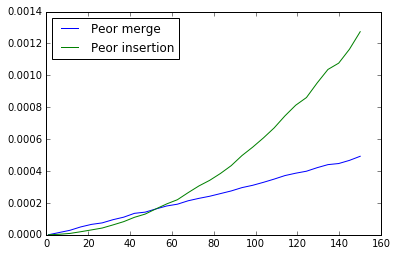

In [12]:
plt.plot(x,Worstm,x,Worsti)
plt.legend(['Peor merge','Peor insertion'],loc='best')

Para ser mas exacto con el tamaño (k) en el que el merge sort comienza a funcionar mejor que el insertion, se realiza un ciclo en el que se comparan los tiempos de ambos algoritmos para cada tamaño hasta que el tiempo del merge sea menor. Asi se halla un k para la grafica donde se compara el peor caso(kw), y otro k para la grafica donde se compara el caso promedio.

In [13]:
kw = 0; ka = 0
for i in xrange(1,len(Worstm)):
    if Worsti[i] > Worstm[i]:
        kw = i*5
        break
for i in xrange(1,len(Avgi)):
    if Avgi[i] > Avgm[i]:
        ka = i*5
        break
    
print kw, ka

50 125


Habiendo hallado los valores de k se procede a implementar el merge sort para que utilice el insertion sort para tamaños menores o iguales a k. El experimento consiste en tomar una permutación aleatoria para cada tamaño y tomar el tiempo de ejecución del merge sort y del merge sort implementado con insertion sort y almacenar el promedio de los tiempos hallados con las muestras. En este caso el k utilizado es k=125

In [14]:
def insertion(L,p,r):
    j = p+1
    while j < r+1:
        key = L[j]
        i = j - 1
        while (i >= p) and (L[i] > key):
            L[i + 1] = L[i]
            i = i -1
        L[i + 1] = key
        j = j + 1
            
def merge_insertion_main(A, p, r):
    if (r-p) <= ka:
        insertion(A,p,r)
    else:
        if p < r:
            q = int((p + r) / 2.0)
            merge_insertion_main(A, p, q)
            merge_insertion_main(A, q + 1, r)
            merge(A, p, q, r)
            
def merge_insertion(A):
    t0 = time.clock()
    merge_insertion_main(A, 0, len(A) - 1)
    return time.clock() - t0

def t3(a,b):
    for n in xrange(a,b+1,5):
        timesma =0.0
        samples = 1000
        for i in xrange(samples):
            A = np.random.permutation(n) 
            timesma += merge_insertion(list(A))
        tma.append(timesma/samples)
tma = []
minim = 1; maxim = 150
t3(minim,maxim)

Una vez tomados y graficados los tiempos para ambos algoritmos, se puede observar como la implementacion toma una forma cuadratica igual al insertion hasta el punto donde el tamaño es igual a k y de alli en adelante comienza a usar el merge.

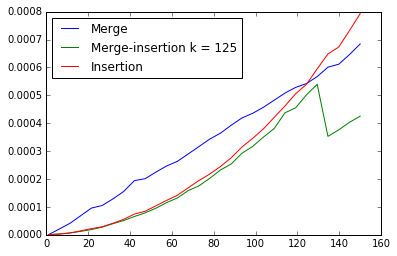

In [15]:
x3 = np.linspace(minim,maxim,maxim/5)#n-m+1)
plt.plot(x,Avgm,x,tma,x,Avgi)
plt.legend(['Merge','Merge-insertion k = 125','Insertion'],loc='best')

Ahora se realiza el mismo experimento pero utilizando el k=50 y se procede a graficar el resultado comparandolo con la grafica anterior.

In [16]:
def merge_insertion_main(A, p, r):
    if (r-p) <= kw:
        insertion(A,p,r)
    else:
        if p < r:
            q = int((p + r) / 2.0)
            merge_insertion_main(A, p, q)
            merge_insertion_main(A, q + 1, r)
            merge(A, p, q, r)
            
def t3(a,b):
    for n in xrange(a,b+1,5):
        timesmw = 0.0
        samples = 1000
        for i in xrange(samples):
            A = np.random.permutation(n) 
            timesmw += merge_insertion(list(A))
        tmw.append(timesmw/samples)
tmw = []
minim = 1; maxim = 150
t3(minim,maxim)

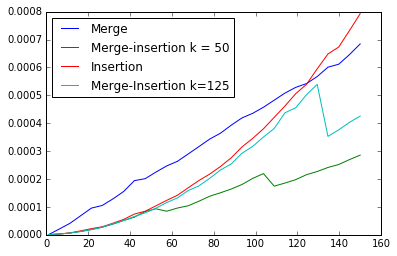

In [17]:
plt.plot(x,Avgm,x,tmw,x,Avgi,x,tma)
plt.legend(['Merge','Merge-insertion k = 50','Insertion','Merge-Insertion k=125'],loc='best')

En la anterior grafica se nota como la implementacion del merge con el insertion para un k=50 es mejor que utilizando el k=125, por tanto nuestro mejor k sera 50.